In [1]:
!nvidia-smi

Sun Apr 24 09:15:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.00    Driver Version: 418.87.00    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:3B:00.0 Off |                    0 |
| N/A   30C    P0    31W / 250W |   8717MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P100-PCIE...  Off  | 00000000:D8:00.0 Off |                    0 |
| N/A   31C    P0    31W / 250W |    377MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
import pandas as pd
# !pip install pandas

In [3]:
# Read and display data
train = pd.read_csv("train.csv")
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [6]:
train.drop(columns=["id","Policy_Sales_Channel"], inplace=True)

In [10]:
train = pd.get_dummies(train, columns=["Gender"],drop_first=True)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train[["Age", "Annual_Premium", "Vintage"]] = scaler.fit_transform(train[["Age", "Annual_Premium", "Vintage"]]) 


In [24]:
train["Region_Code"] = train["Region_Code"].apply(lambda x: 1 if x==28 else 0)

In [26]:
train["Region_Code"].value_counts()

0    274694
1    106415
Name: Region_Code, dtype: int64

In [31]:
train = pd.get_dummies(train, columns=["Vehicle_Age"],drop_first=True)

In [33]:
train = pd.get_dummies(train, columns=["Vehicle_Damage"],drop_first=True)

In [34]:
train

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0.369231,1,1,0,0.070366,0.716263,1,1,0,1,1
1,0.861538,1,0,0,0.057496,0.598616,0,1,0,0,0
2,0.415385,1,1,0,0.066347,0.058824,1,1,0,1,1
3,0.015385,1,0,1,0.048348,0.667820,0,1,1,0,0
4,0.138462,1,0,1,0.046259,0.100346,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,0.830769,1,0,1,0.051234,0.269896,0,1,0,0,0
381105,0.153846,1,0,1,0.069551,0.418685,0,1,1,0,0
381106,0.015385,1,0,1,0.060439,0.522491,0,1,1,0,0
381107,0.738462,1,0,0,0.078110,0.221453,0,0,0,1,1


In [35]:
train.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
Age,1.000000,-0.079782,0.298304,-0.254682,0.067507,-0.001264,0.111147,0.145545,-0.787775,0.220694,0.267534
Driving_License,-0.079782,1.000000,-0.016017,0.014969,-0.011906,-0.000848,0.010155,-0.018374,0.040215,-0.006211,-0.016622
Region_Code,0.298304,-0.016017,1.000000,-0.182873,0.293050,0.000369,0.122609,0.029822,-0.325856,0.147437,0.193135
Previously_Insured,-0.254682,0.014969,-0.182873,1.000000,0.004269,0.002537,-0.341170,-0.081932,0.358773,-0.191352,-0.824143
Annual_Premium,0.067507,-0.011906,0.293050,0.004269,1.000000,-0.000608,0.022575,0.003673,-0.022555,0.061918,0.009349
Vintage,-0.001264,-0.000848,0.000369,0.002537,-0.000608,1.000000,-0.001050,-0.002517,0.002410,0.000600,-0.002064
Response,0.111147,0.010155,0.122609,-0.341170,0.022575,-0.001050,1.000000,0.052440,-0.209878,0.109300,0.354400
Gender_Male,0.145545,-0.018374,0.029822,-0.081932,0.003673,-0.002517,0.052440,1.000000,-0.166280,0.043155,0.091606
Vehicle_Age_< 1 Year,-0.787775,0.040215,-0.325856,0.358773,-0.022555,0.002410,-0.209878,-0.166280,1.000000,-0.182750,-0.370778
Vehicle_Age_> 2 Years,0.220694,-0.006211,0.147437,-0.191352,0.061918,0.000600,0.109300,0.043155,-0.182750,1.000000,0.206961


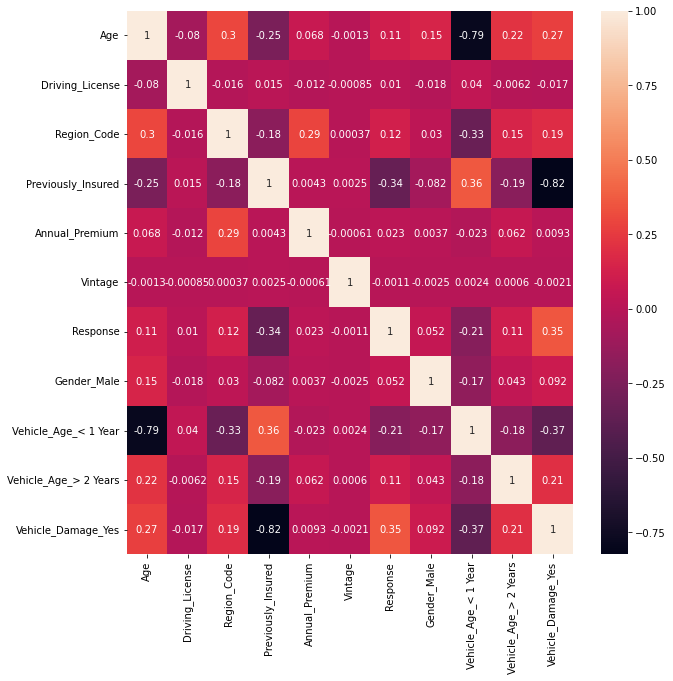

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
# !pip install seaborn
# !pip install matplotlib

fig, ax = plt.subplots(figsize=(10,10))   
dataplot = sns.heatmap(train.corr(), annot=True, ax = ax)

In [38]:
X = train.drop(columns=["Response"])
y = train["Response"]
X.shape, y.shape

((381109, 10), (381109,))

In [43]:
# Split train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape

((304887, 10), (304887,))

In [44]:
y_train.value_counts()

0    267700
1     37187
Name: Response, dtype: int64

In [45]:
# Oversampling use SMOTE
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

X_train_os.shape, y_train_os.shape

((535400, 10), (535400,))

In [46]:
y_train_os.value_counts()

1    267700
0    267700
Name: Response, dtype: int64

# Logistic Regression no Oversampling

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       1.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.94      0.50      0.47     76222
weighted avg       0.89      0.88      0.82     76222



/home/anhpv/.conda/envs/mtcnn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


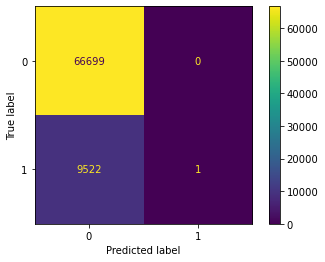

In [47]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_log, X_test, y_test)

# Logistic Regression with OS

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



/home/anhpv/.conda/envs/mtcnn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


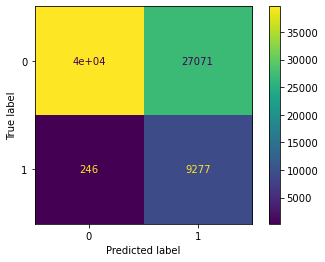

In [48]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

model_log = LogisticRegression()
model_log.fit(X_train_os, y_train_os)

y_pred = model_log.predict(X_test)

print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_log, X_test, y_test)

# XGBoost (with OS/no OS)

In [ ]:
# !pip install xgboost
Vehicle_Age_< 1 Year	Vehicle_Age_> 2 Years

In [51]:
X_train = X_train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")
X_test = X_test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")
X_train_os = X_train_os.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.41      0.01      0.01      9523

    accuracy                           0.87     76222
   macro avg       0.64      0.50      0.47     76222
weighted avg       0.82      0.87      0.82     76222



/home/anhpv/.conda/envs/mtcnn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


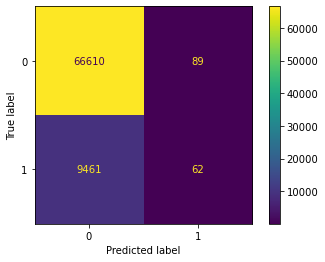

In [53]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=100)
model_xgb.fit(X_train, y_train)


y_pred = model_xgb.predict(X_test)

print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_xgb, X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.77      0.85     66699
           1       0.32      0.75      0.44      9523

    accuracy                           0.76     76222
   macro avg       0.64      0.76      0.65     76222
weighted avg       0.88      0.76      0.80     76222



/home/anhpv/.conda/envs/mtcnn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


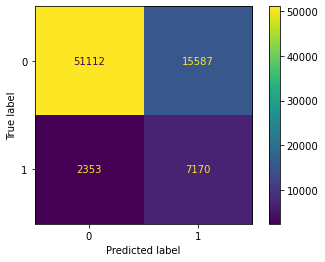

In [54]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=100)
model_xgb.fit(X_train_os, y_train_os)


y_pred = model_xgb.predict(X_test)

print(classification_report( y_test, y_pred))
plot_confusion_matrix(model_xgb, X_test, y_test)

# Random Forest

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66699
           1       0.31      0.15      0.21      9523

    accuracy                           0.85     76222
   macro avg       0.60      0.55      0.56     76222
weighted avg       0.82      0.85      0.83     76222



/home/anhpv/.conda/envs/mtcnn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


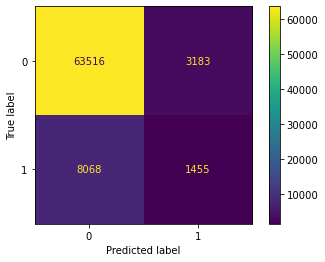

In [55]:
# RandomForest no OS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier(random_state=42) 
forest.fit(X_train,y_train) 

y_pred = forest.predict(X_test)

print(classification_report( y_test, y_pred))
plot_confusion_matrix(forest, X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     66699
           1       0.30      0.47      0.37      9523

    accuracy                           0.80     76222
   macro avg       0.61      0.66      0.62     76222
weighted avg       0.84      0.80      0.81     76222



/home/anhpv/.conda/envs/mtcnn/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


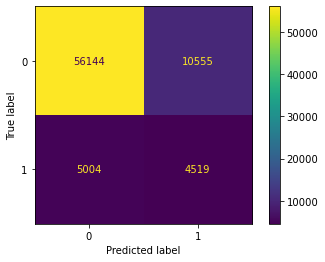

In [56]:
# RandomForest with OS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier(random_state=42) 
forest.fit(X_train_os,y_train_os) 

y_pred = forest.predict(X_test)

print(classification_report( y_test, y_pred))
plot_confusion_matrix(forest, X_test, y_test)